In [1]:
%load_ext autoreload
%autoreload 2

In [62]:
import os
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm
from skimage import draw
from skimage.transform import resize
import matplotlib
matplotlib.rcParams.update({'font.size': 16})

from euclid_morphology import cutouts


def create_plots(image, seg, catalog, cutout_pixels=300, n_examples=30):
    _, ax = plt.subplots(ncols=8, nrows=n_examples, figsize=(8 * 8, 8 * n_examples))

    # image = np.log10(image - image.min() + 1)
    arcsinh_factor = 1#
    image = image / image.max()
    image = np.clip(image, a_min=0, a_max=np.quantile(image, 0.998))
    image = np.arcsinh(image * arcsinh_factor)


    for i in tqdm(range(n_examples)):
        galaxy = catalog.iloc[i]
        ra = galaxy['x']
        dec = galaxy['y']
        # seg_id = galaxy['SEG_ID']
        # params = cutouts.extract_params_by_source_index(catalog, np.random.randint(0, len(catalog)))
        ref_seg = seg[int(dec) - 64: int(dec) + 64, int(ra) - 64: int(ra) + 64]
        ref_img = image[int(dec) - 64: int(dec) + 64, int(ra) - 64: int(ra) + 64]
        # seg_cutout = cutouts.get_cutout_from_seg_map(seg, image, seg_id)
        seg_cutout = cutouts.get_cutout(image, galaxy)
        # axes = params[['SEMIMAJOR_AXIS', 'SEMIMINOR_AXIS']].values
        # rows, cols = draw.ellipse(r=ra, c=dec, r_radius=axes[0], c_radius=axes[1], shape=seg.shape)
        # ellipse = np.zeros_like(seg)
        # ellipse[cols, rows] = 1
        # maj_cutout = cutouts.get_cutout_from_seg_map(ellipse, image, 1)
        # rows, cols = draw.ellipse(r=ra, c=dec, r_radius=3 * axes[0], c_radius=3 * axes[1], shape=seg.shape)
        # ellipse = np.zeros_like(seg)
        # ellipse[cols, rows] = 1
        # maj3_cutout = cutouts.get_cutout_from_seg_map(ellipse, image, 1)

        seg_resized = resize(seg_cutout, output_shape=(cutout_pixels, cutout_pixels))
        # maj_resized = resize(maj_cutout, output_shape=(cutout_pixels, cutout_pixels))
        # maj3_resized = resize(maj3_cutout, output_shape=(cutout_pixels, cutout_pixels))

        ax[i, 0].imshow(ref_img, origin='lower', cmap='viridis')
        if i == 0:
            ax[i, 0].set_title('Reference Image Cutouts')
        ax[i, 1].imshow(ref_seg, origin='lower', cmap='viridis')
        if i == 0:
            ax[i, 1].set_title('Reference Segmentation Cutout')
        ax[i, 2].imshow(seg_cutout, origin='lower', cmap='viridis')
        if i == 0:
            ax[i, 2].set_title('Segmentation Derived Cutouts')
        # ax[i, 3].imshow(maj_cutout, origin='lower', cmap='viridis')
        # if i == 0:
        #     ax[i, 3].set_title('Major Axis Derived Cutouts')
        # ax[i, 4].imshow(maj3_cutout, origin='lower', cmap='viridis')
        if i == 0:
            ax[i, 4].set_title('3x Major Axis Derived Cutouts')
        ax[i, 5].imshow(seg_resized, origin='lower', cmap='viridis')
        if i == 0:
            ax[i, 5].set_title('Segmentation Derived Cutouts Resized')
        # ax[i, 6].imshow(maj_resized, origin='lower', cmap='viridis')
        # if i == 0:
        #     ax[i, 6].set_title('Major Axis Derived Cutouts Resized')
        # ax[i, 7].imshow(maj3_resized, origin='lower', cmap='viridis')
        # if i == 0:
        #     ax[i, 7].set_title('3x Major Axis Derived Cutouts Resized')
    plt.tight_layout()
    plt.show()



In [3]:
repo_root = Path(os.path.dirname(os.getcwd()))
data_dir = repo_root / 'data/example_tile'

catalog_file = data_dir / 'EUC_MER_FINAL-CUTOUTS-CAT_TILE100158586-2F9FF9_20220829T221845.491503Z_00.00.fits'
mosaic_file = data_dir / 'EUC_MER_BGSUB-MOSAIC-VIS_TILE100158586-863FA9_20220829T190315.054985Z_00.00.fits'
segmentation_file = data_dir / 'EUC_MER_FINAL-SEGMAP_TILE100158586-CB5786_20220829T221845.491530Z_00.00.fits'


In [4]:
image, seg, catalog = cutouts.load_data_for_mosaic(catalog_file, segmentation_file, mosaic_file)

In [5]:
len(catalog)

21529

In [6]:
source_index = 400

In [7]:
cutout = cutouts.prepare_image(image, seg, catalog, source_index, mode='seg', m=1.5)

In [8]:
# cutout_maj = cutouts.prepare_image(image, seg, catalog, source_index, mode='maj', m=1.5)

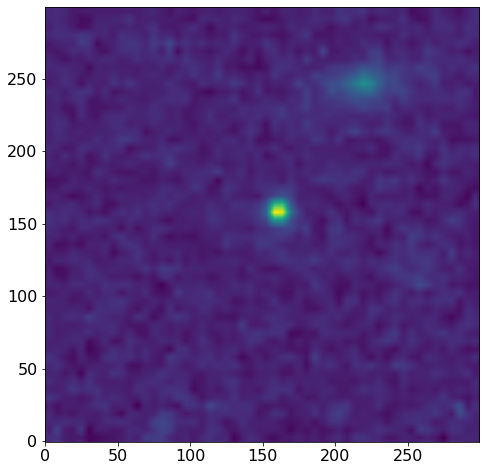

In [9]:
plt.figure(figsize=(8, 8))
plt.imshow(cutout[0, :, :, 0], origin='lower', cmap='viridis')
plt.show()

# plt.figure(figsize=(8, 8))
# plt.imshow(cutout_maj[0, :, :, 0], origin='lower', cmap='viridis')
# plt.show()


In [ ]:
catalog.columns.values

array(['OBJECT_ID', 'RIGHT_ASCENSION', 'DECLINATION', 'CORNER_0_RA',
       'CORNER_0_DEC', 'CORNER_1_RA', 'CORNER_1_DEC', 'CORNER_2_RA',
       'CORNER_2_DEC', 'CORNER_3_RA', 'CORNER_3_DEC', 'SEMIMAJOR_AXIS',
       'SEMIMINOR_AXIS', 'POSITION_ANGLE', 'PARENT_ID', 'PARENT_VISNIR',
       'FLUX_DETECTION_TOTAL', 'x', 'y', 'x0', 'y0', 'x1', 'y1', 'x2',
       'y2', 'x3', 'y3', 'SEG_ID'], dtype=object)

In [13]:
catalog[['x0', 'x1', 'x2', 'x3', 'y0', 'y1', 'y2', 'y3']]

x0            x1       x2            x3       y0            y1  \
0      18321.0  18332.098056  18332.0  18320.902068    611.0    611.099566   
1      18342.0  18353.089276  18353.0  18341.910838    637.0    637.099730   
2      18327.0  18337.080200  18337.0  18326.919892    711.0    711.090503   
3      18315.0  18340.223085  18340.0  18314.777559    711.0    711.226344   
4      18137.0  18142.052415  18142.0  18136.947616    731.0    731.044363   
...        ...           ...      ...           ...      ...           ...   
21524   9222.0   9249.990107   9250.0   9222.010687  18573.0  18572.989315   
21525   9844.0   9863.004432   9863.0   9843.995887  18587.0  18587.005086   
21526  12999.0  13038.118601  13038.0  12998.882749  18589.0  18589.140674   
21527  11165.0  11201.053704  11201.0  11164.947505  18621.0  18621.060061   
21528  16191.0  16246.220573  16246.0  16190.781259  18657.0  18657.384440   

            y2            y3  
0        622.0    621.900435  
1        647.0    646.900271  
2        720.0    719.909498  
3        736.0    735.773660  
4        737.0    736.955637  
...        ...           ...  
21524  18600.0  18600.010685  
21525  18603.0  18602.994914  
21526  18622.0  18621.859330  
21527  18653.0  18652.939941  
21528  18689.0  18688.615570  

[21529 rows x 8 columns]

Text(0.5, 1.0, 'Corner index is defined anticlockwise from bottom-right')

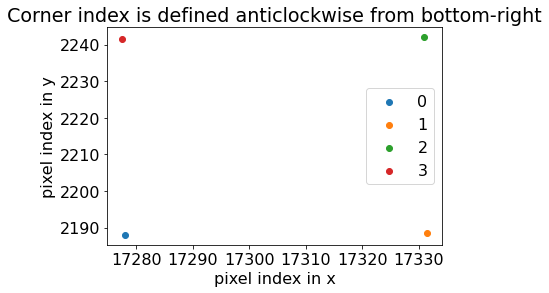

In [14]:
source = catalog.iloc[400]
for i in range(4):
    plt.scatter(source[f'x{i}'], source[f'y{i}'], label=i)
plt.legend()
plt.xlabel('pixel index in x')
plt.ylabel('pixel index in y')
plt.title('Corner index is defined anticlockwise from bottom-right')


In [ ]:
seg.max()

100158586119322

In [32]:
data = []

for _, source in catalog.sample(20).iterrows():
    # test the pixel corners are indeed the max and min indices
    y_indices, x_indices = np.where(seg == source['SEG_ID'])

    y_top_seg = y_indices.max()
    y_top_cat = source['y3']

    y_bottom_seg = y_indices.min()
    y_bottom_cat = source['y0']

    height_seg = y_top_seg - y_bottom_seg
    height_cat = y_top_cat - y_bottom_cat

    data.append({
        'seg_id': source['SEG_ID'],
        'y_top_seg': y_top_seg,
        'y_top_cat': y_top_cat,
        'y_bottom_seg': y_bottom_seg,
        'y_bottom_cat': y_bottom_cat,
        'height_seg': height_seg,
        'height_cat': height_cat,
        'height_delta': height_cat - height_seg
        })

In [33]:
corner_check = pd.DataFrame(data)
corner_check['corner_delta'] = corner_check['y_top_cat'] - corner_check['y_top_seg']
corner_check

seg_id  y_top_seg     y_top_cat  y_bottom_seg  y_bottom_cat  \
0   1.001586e+14      17845  17852.957789         17819       17811.0   
1   1.001586e+14      14544  14567.649217         14537       14514.0   
2   1.001586e+14       8894   8918.427382          8874        8848.0   
3   1.001586e+14       6903   6927.436318          6893        6867.0   
4   1.001586e+14      12429  12449.837639         12425       12403.0   
5   1.001586e+14       6450   6472.634483          6445        6423.0   
6   1.001586e+14      12297  12321.576257         12290       12266.0   
7   1.001586e+14       4934   4958.463582          4924        4898.0   
8   1.001586e+14       8255   8261.500249          8237        8230.0   
9   1.001586e+14       2661   2686.442268          2652        2627.0   
10  1.001586e+14       5614   5638.506764          5605        5581.0   
11  1.001586e+14       2764   2787.416635          2756        2731.0   
12  1.001586e+14      11689  11712.696685         11680       11657.0   
13  1.001586e+14      12644  12666.661841         12638       12614.0   
14  1.001586e+14       9742   9763.657843          9736        9713.0   
15  1.001586e+14      15752  15776.573790         15736       15710.0   
16  1.001586e+14       8892   8913.671842          8886        8863.0   
17  1.001586e+14      15130  15155.489292         15117       15092.0   
18  1.001586e+14      16223  16248.674403         16206       16181.0   
19  1.001586e+14       4453   4476.361057          4416        4393.0   

    height_seg  height_cat  height_delta  corner_delta  
0           26   41.957789     15.957789      7.957789  
1            7   53.649217     46.649217     23.649217  
2           20   70.427382     50.427382     24.427382  
3           10   60.436318     50.436318     24.436318  
4            4   46.837639     42.837639     20.837639  
5            5   49.634483     44.634483     22.634483  
6            7   55.576257     48.576257     24.576257  
7           10   60.463582     50.463582     24.463582  
8           18   31.500249     13.500249      6.500249  
9            9   59.442268     50.442268     25.442268  
10           9   57.506764     48.506764     24.506764  
11           8   56.416635     48.416635     23.416635  
12           9   55.696685     46.696685     23.696685  
13           6   52.661841     46.661841     22.661841  
14           6   50.657843     44.657843     21.657843  
15          16   66.573790     50.573790     24.573790  
16           6   50.671842     44.671842     21.671842  
17          13   63.489292     50.489292     25.489292  
18          17   67.674403     50.674403     25.674403  
19          37   83.361057     46.361057     23.361057

(array([2., 0., 0., 0., 0., 0., 0., 3., 6., 9.]),
 array([ 6.50024914,  8.41766451, 10.33507989, 12.25249527, 14.16991064,
        16.08732602, 18.0047414 , 19.92215677, 21.83957215, 23.75698752,
        25.6744029 ]),
 <BarContainer object of 10 artists>)

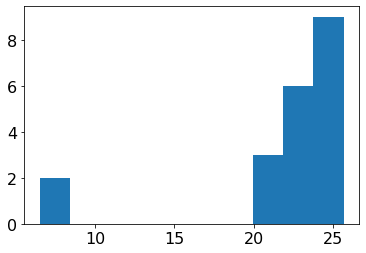

In [34]:
plt.hist(corner_check['corner_delta'])

Text(0, 0.5, 'Height from SegMap')

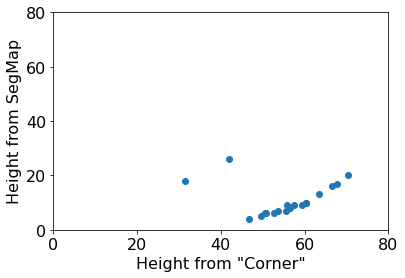

In [64]:
plt.scatter(corner_check['height_cat'], corner_check['height_seg'])
plt.xlim([0., 80.])
plt.ylim([0., 80.])
plt.xlabel('Height from "Corner"')
plt.ylabel('Height from SegMap')
# corners are definitely not simply the segmap corners - mostly, they are proportional

In [ ]:
y_indices.min(), source['y0']

(2211, 2187.999999999909)

In [ ]:
x_indices.max(), source['x1']

(17308, 17331.427419980173)

In [ ]:
x_indices.min(), source['x0']
# yes, pixel indices in segmentation map found manually with np.where match coord-to-pixel indices of corners listed in catalog
# so no need to use np.where, can just use corners directly

(17302, 17277.99999999986)

In [37]:
catalog['segmap_pixel_width'] = catalog['x1'] - catalog['x0']
catalog['segmap_pixel_height'] = catalog['y3'] - catalog['y0']

Text(0.5, 0, 'SegMap width (pixels)')

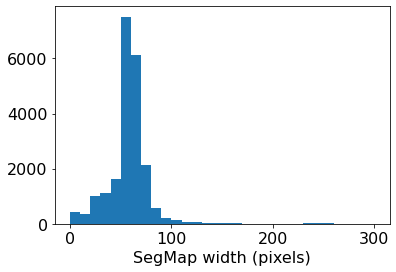

In [65]:
_ = plt.hist(catalog['segmap_pixel_width'], range=(0, 300), bins=30)
plt.xlabel('SegMap width (pixels)')
# _ = plt.hist(catalog['segmap_pixel_height'], range=(0, 300), bins=30)  # the same, thankfully

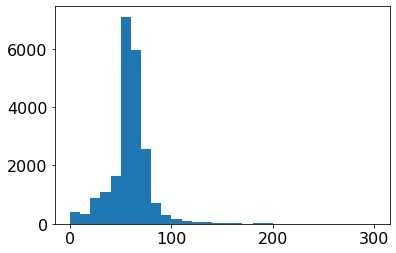

In [39]:
catalog['min_pixel_extent'] = catalog[['segmap_pixel_width', 'segmap_pixel_height']].min(axis=1)
catalog['max_pixel_extent'] = catalog[['segmap_pixel_width', 'segmap_pixel_height']].max(axis=1)
_ = plt.hist(catalog['max_pixel_extent'], range=(0, 300), bins=30)  # this will set size of cutout (other axis will be set this big, e.g. edge-on disk)

In [40]:
detailed_catalog = catalog.query('max_pixel_extent >= 75')
# mosaic is in native pixels so this will correspond to some angular size (pixels * native pixel resolution in arcsec)
len(detailed_catalog)

2392

100%|██████████| 10/10 [00:00<00:00, 314.78it/s]


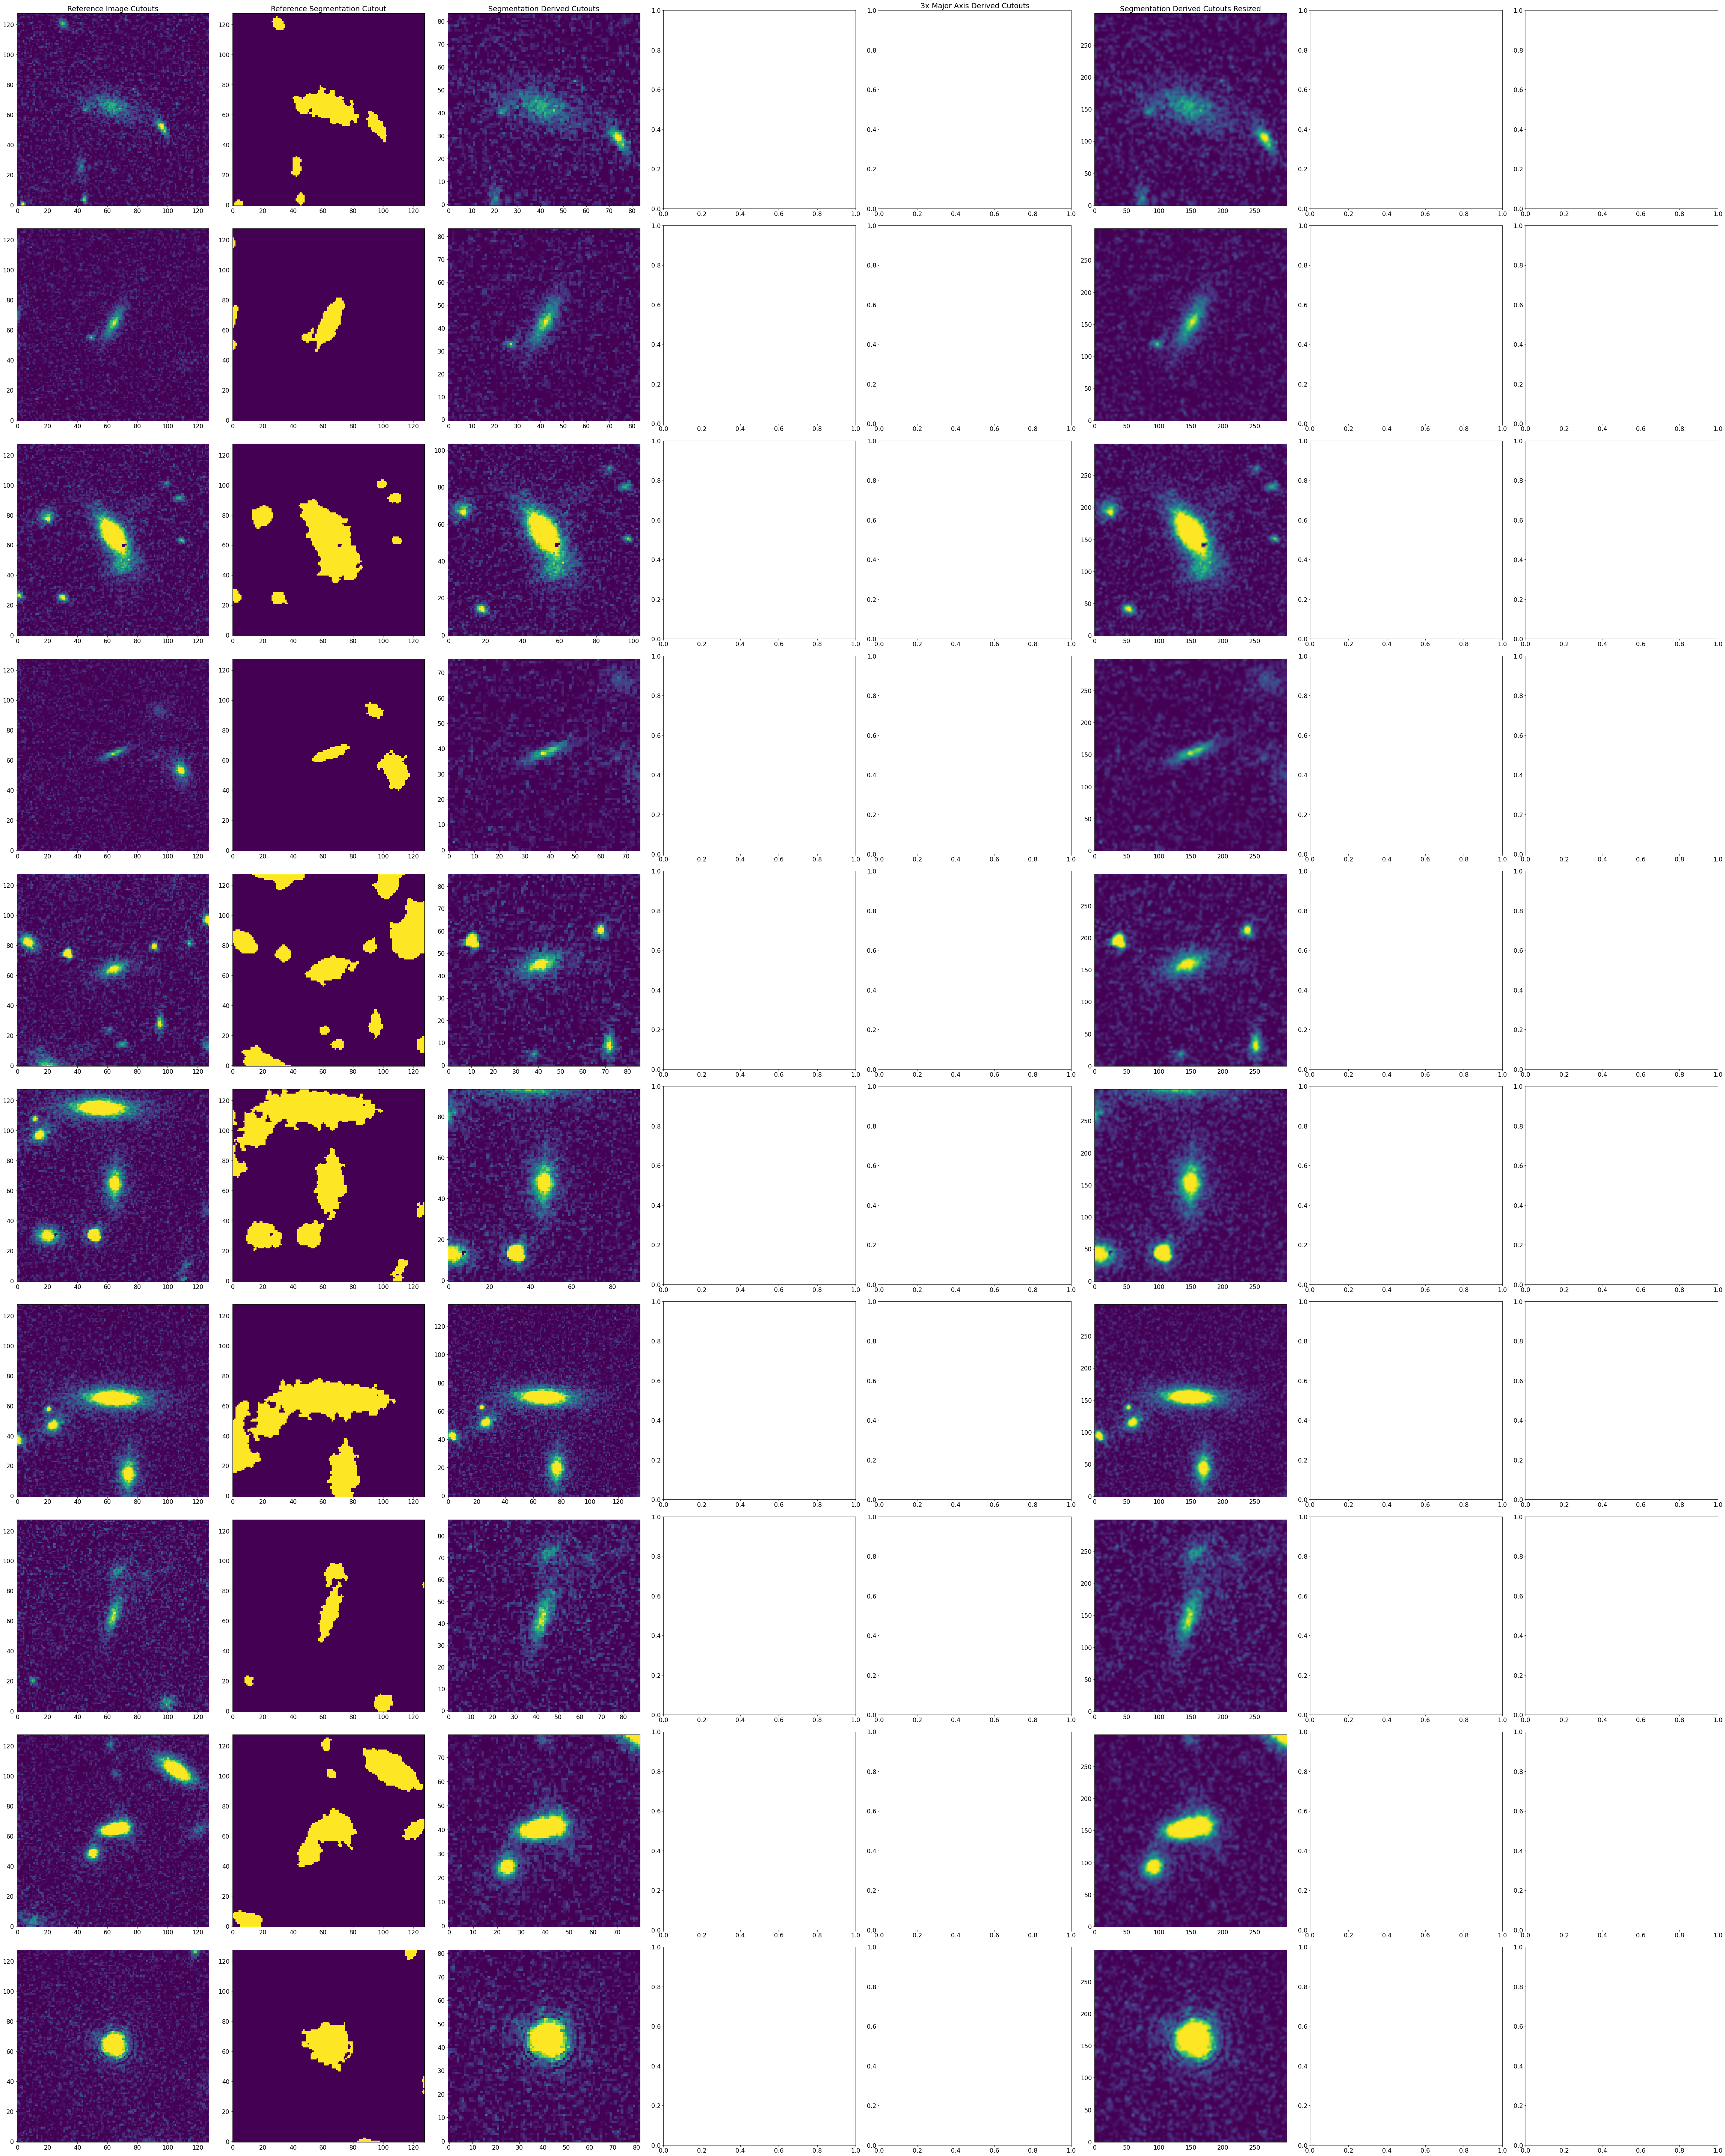

In [63]:

# 30 examples * 6ish cutout versions = ~180 seconds 
create_plots(image, seg, detailed_catalog, n_examples=10)